In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import requests
import numpy as np

## CONFIG HERE
api_key = '' # https://coda.io/account
document_id = 'EPiqyWDwm5' # https://coda.io/developers/apis/v1beta1#section/Using-the-API/Resource-IDs-and-Links
table_id = 'grid-vCafM68vHW'

save_as_csv = False # optional: Save the table as a CSV

# Get rows
headers = {'Authorization': 'Bearer '+api_key}
uri = f'https://coda.io/apis/v1beta1/docs/EPiqyWDwm5/tables/grid-vCafM68vHW/rows'
req = requests.get(uri, headers=headers)
req.raise_for_status() # Throw if there was an error.
res = req.json()

In [3]:
# Get columns
uri = f'https://coda.io/apis/v1beta1/docs/EPiqyWDwm5/tables/grid-vCafM68vHW/columns'
req = requests.get(uri, headers=headers)
req.raise_for_status() # Throw if there was an error.
res_columns = req.json()
columns = []
for item in res_columns["items"]:
    columns.append(item["name"])

In [4]:
# Move dict to dataframe
index = [0]
df=pd.DataFrame()
for item in res["items"]:
    myfile=item["values"]
    df2 = pd.DataFrame(myfile, index=index)
    df = df.append(df2)

# Rename columns
df.columns=columns

# Cleanup
df = df.replace('', np.NaN)
df["Potential Impact (1-100)"] = df["Potential Impact (1-100)"].apply(pd.to_numeric, errors='coerce')

In [8]:
# Optionally save as CSV
if(save_as_csv == True):
    df.to_csv("./coda.csv", sep='\t', encoding='utf-8')

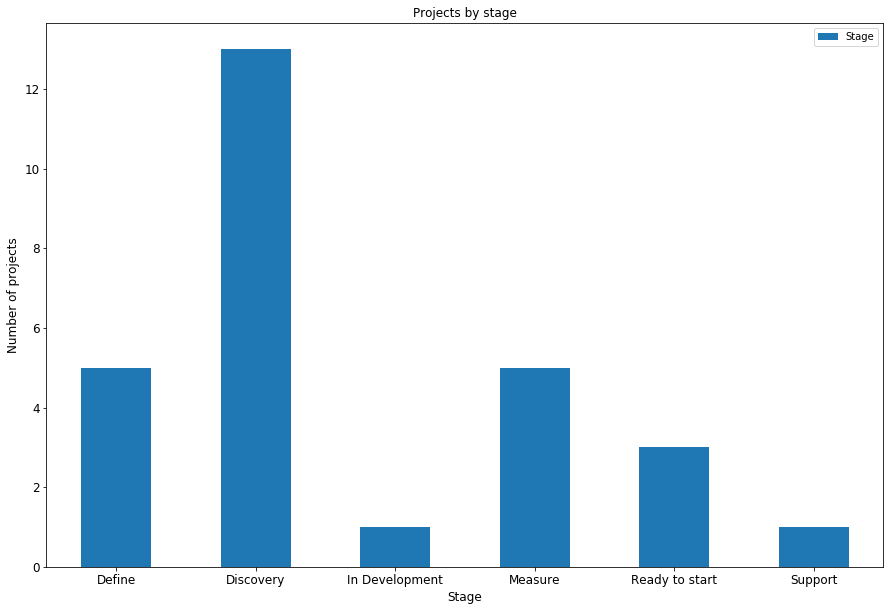

In [20]:
# Make graphs! (or whatever)
import matplotlib.pyplot as plt

project_funnel = df.groupby(['Stage']).agg({'Stage': 'count'})

ax = project_funnel.plot(kind='bar', title ="Projects by stage", figsize=(15, 10), legend=True, fontsize=12, rot=0)
ax.set_xlabel("Stage", fontsize=12)
ax.set_ylabel("Number of projects", fontsize=12)
plt.show()